<a href="https://colab.research.google.com/github/MIkekhan724/ML_Learning/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Summary & Objective :

Historical sales data for 45 Walmart stores located in different regions are available. There are certain events and holidays which impact sales on each day. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to inappropriate machine learning algorithm. Walmart would like to predict the sales and demand accurately. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc. The objective is to determine the factors affecting the sales and to analyze the impact of markdowns around holidays on the sales.

   
  ---

  ### Data Understanding : 


This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in which you will find the following fields:

- Store - the store number

- Date - the week of sales

- Weekly_Sales -  sales for the given store

- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- Temperature - Temperature on the day of sale

- Fuel_Price - Cost of fuel in the region

- CPI – Prevailing consumer price index

- Unemployment - Prevailing unemployment rate



  ---

 ### Data Preparation :

##### Loading required libraries :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns

##### Importing the dataset :

In [ ]:
sales_7_11_data = pd.read_csv('seven_eleven_sales.csv')
sales_7_11_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##### Viewing Data Information :

In [ ]:
# Convert date to datetime format 
sales_7_11_data['Date'] =  pd.to_datetime(sales_7_11_data['Date'])
sales_7_11_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


##### Checking for missing values :

In [ ]:
sales_7_11_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##### Splitting date column into day, month and year :

In [ ]:
sales_7_11_data["Day"]= pd.DatetimeIndex(sales_7_11_data['Date']).day
sales_7_11_data['Month'] = pd.DatetimeIndex(sales_7_11_data['Date']).month
sales_7_11_data['Year'] = pd.DatetimeIndex(sales_7_11_data['Date']).year
sales_7_11_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


 
  ---

 ### Analysis :

c:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


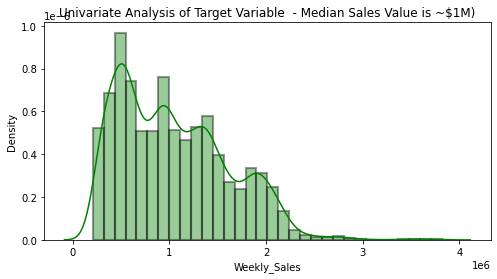

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(sales_7_11_data['Weekly_Sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2.1), bins=32)
plt.title('Univariate Analysis of Target Variable  - Median Sales Value is ~$1M)')
plt.show()

##### 1 ) Which store has maximum sales ?

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

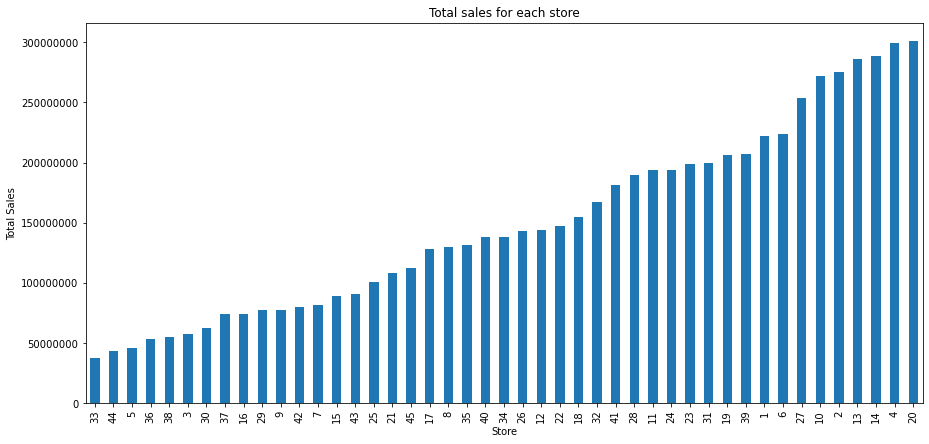

In [ ]:
total_sales= sales_7_11_data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

**Clearly, from the above graph, it is visible that the store which has maximum sales is store number 20 and the store which has minimum sales is the store number 33.**

 
  ---

##### 2) Which store has maximum standard deviation? i.e. the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [ ]:
sales_7_11_data_std = pd.DataFrame(sales_7_11_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
sales_7_11_data_std.head(1).index[0] , sales_7_11_data_std.head(1).Weekly_Sales[sales_7_11_data_std.head(1).index[0]]

(14, 317569.9494755081)

**Thus, the store which has maximum standard deviation is store number 14.**

c:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


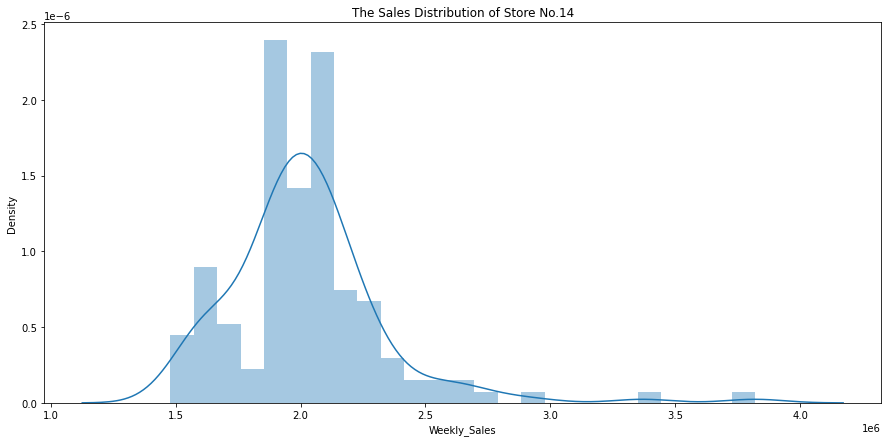

In [ ]:
# Extracting the sales data for store number 14 and plotting its distribution
plt.figure(figsize=(15,7))
sns.distplot(sales_7_11_data[sales_7_11_data['Store'] == sales_7_11_data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(sales_7_11_data_std.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

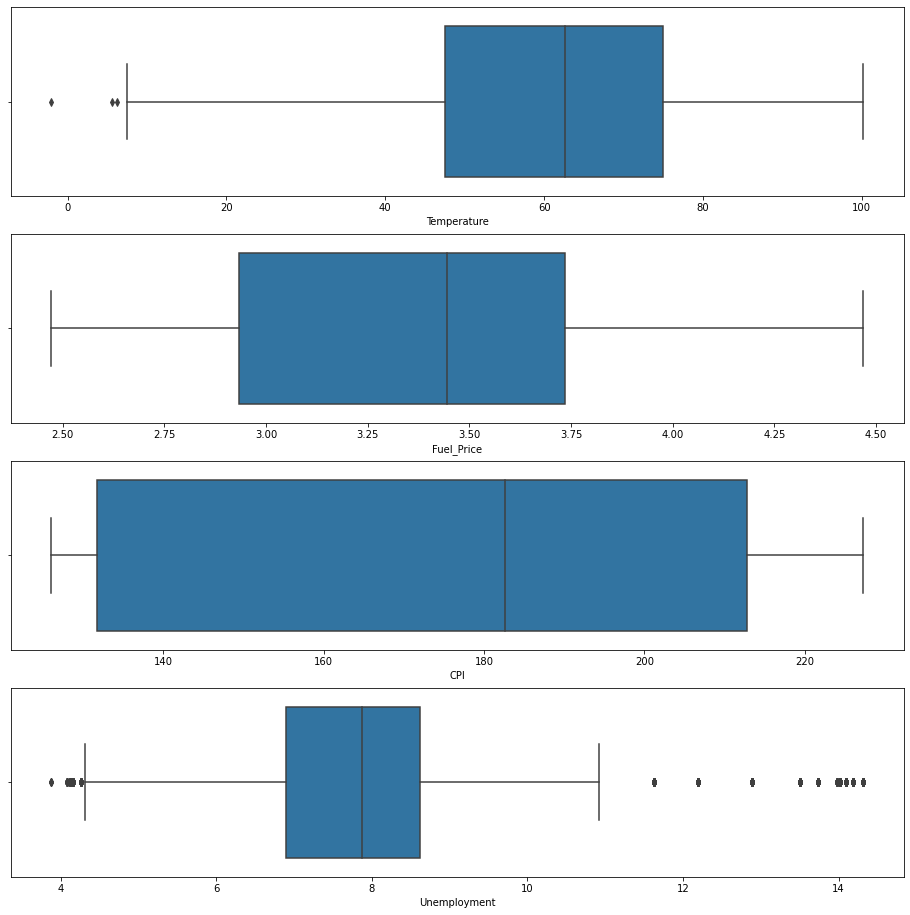

In [ ]:
#Detecting outliers :
fig, axis = plt.subplots(4,figsize=(16,16))
X = sales_7_11_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(sales_7_11_data[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dropping outliers     
sales_7_11_data_clean = sales_7_11_data[(sales_7_11_data['Unemployment']<10) & (sales_7_11_data['Unemployment']>4.5) & (sales_7_11_data['Temperature']>10)]
sales_7_11_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


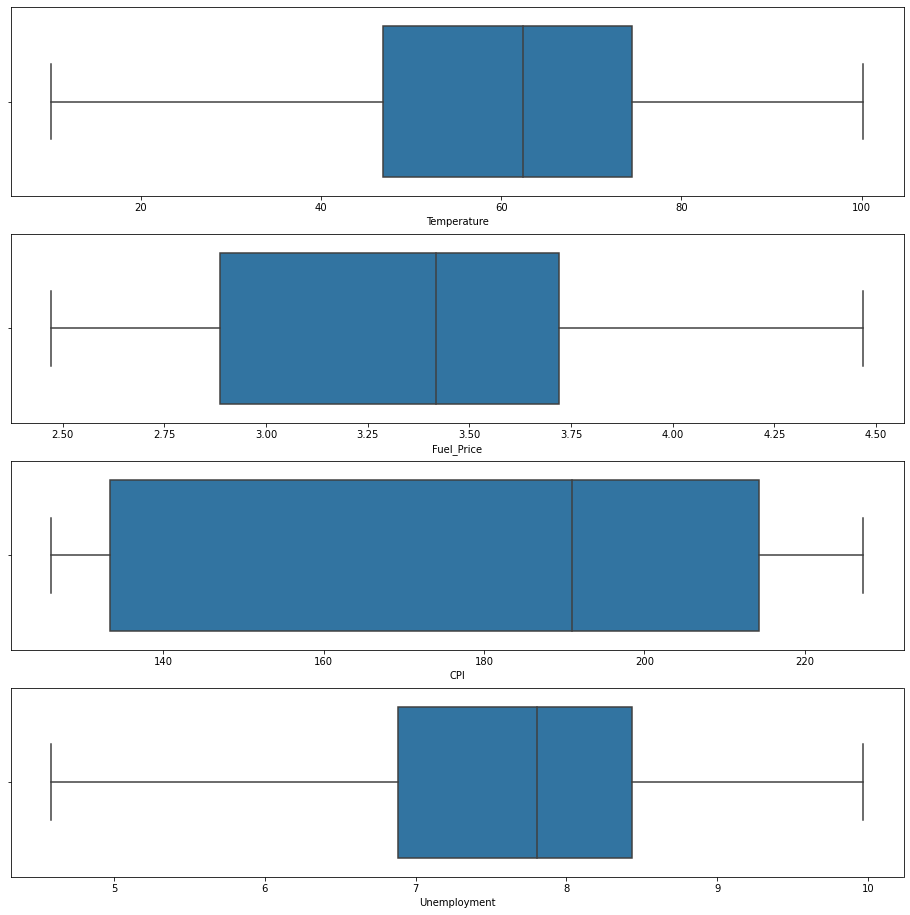

In [ ]:
#Checking data for outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = sales_7_11_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(sales_7_11_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')
    

In [ ]:
sales_7_11_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


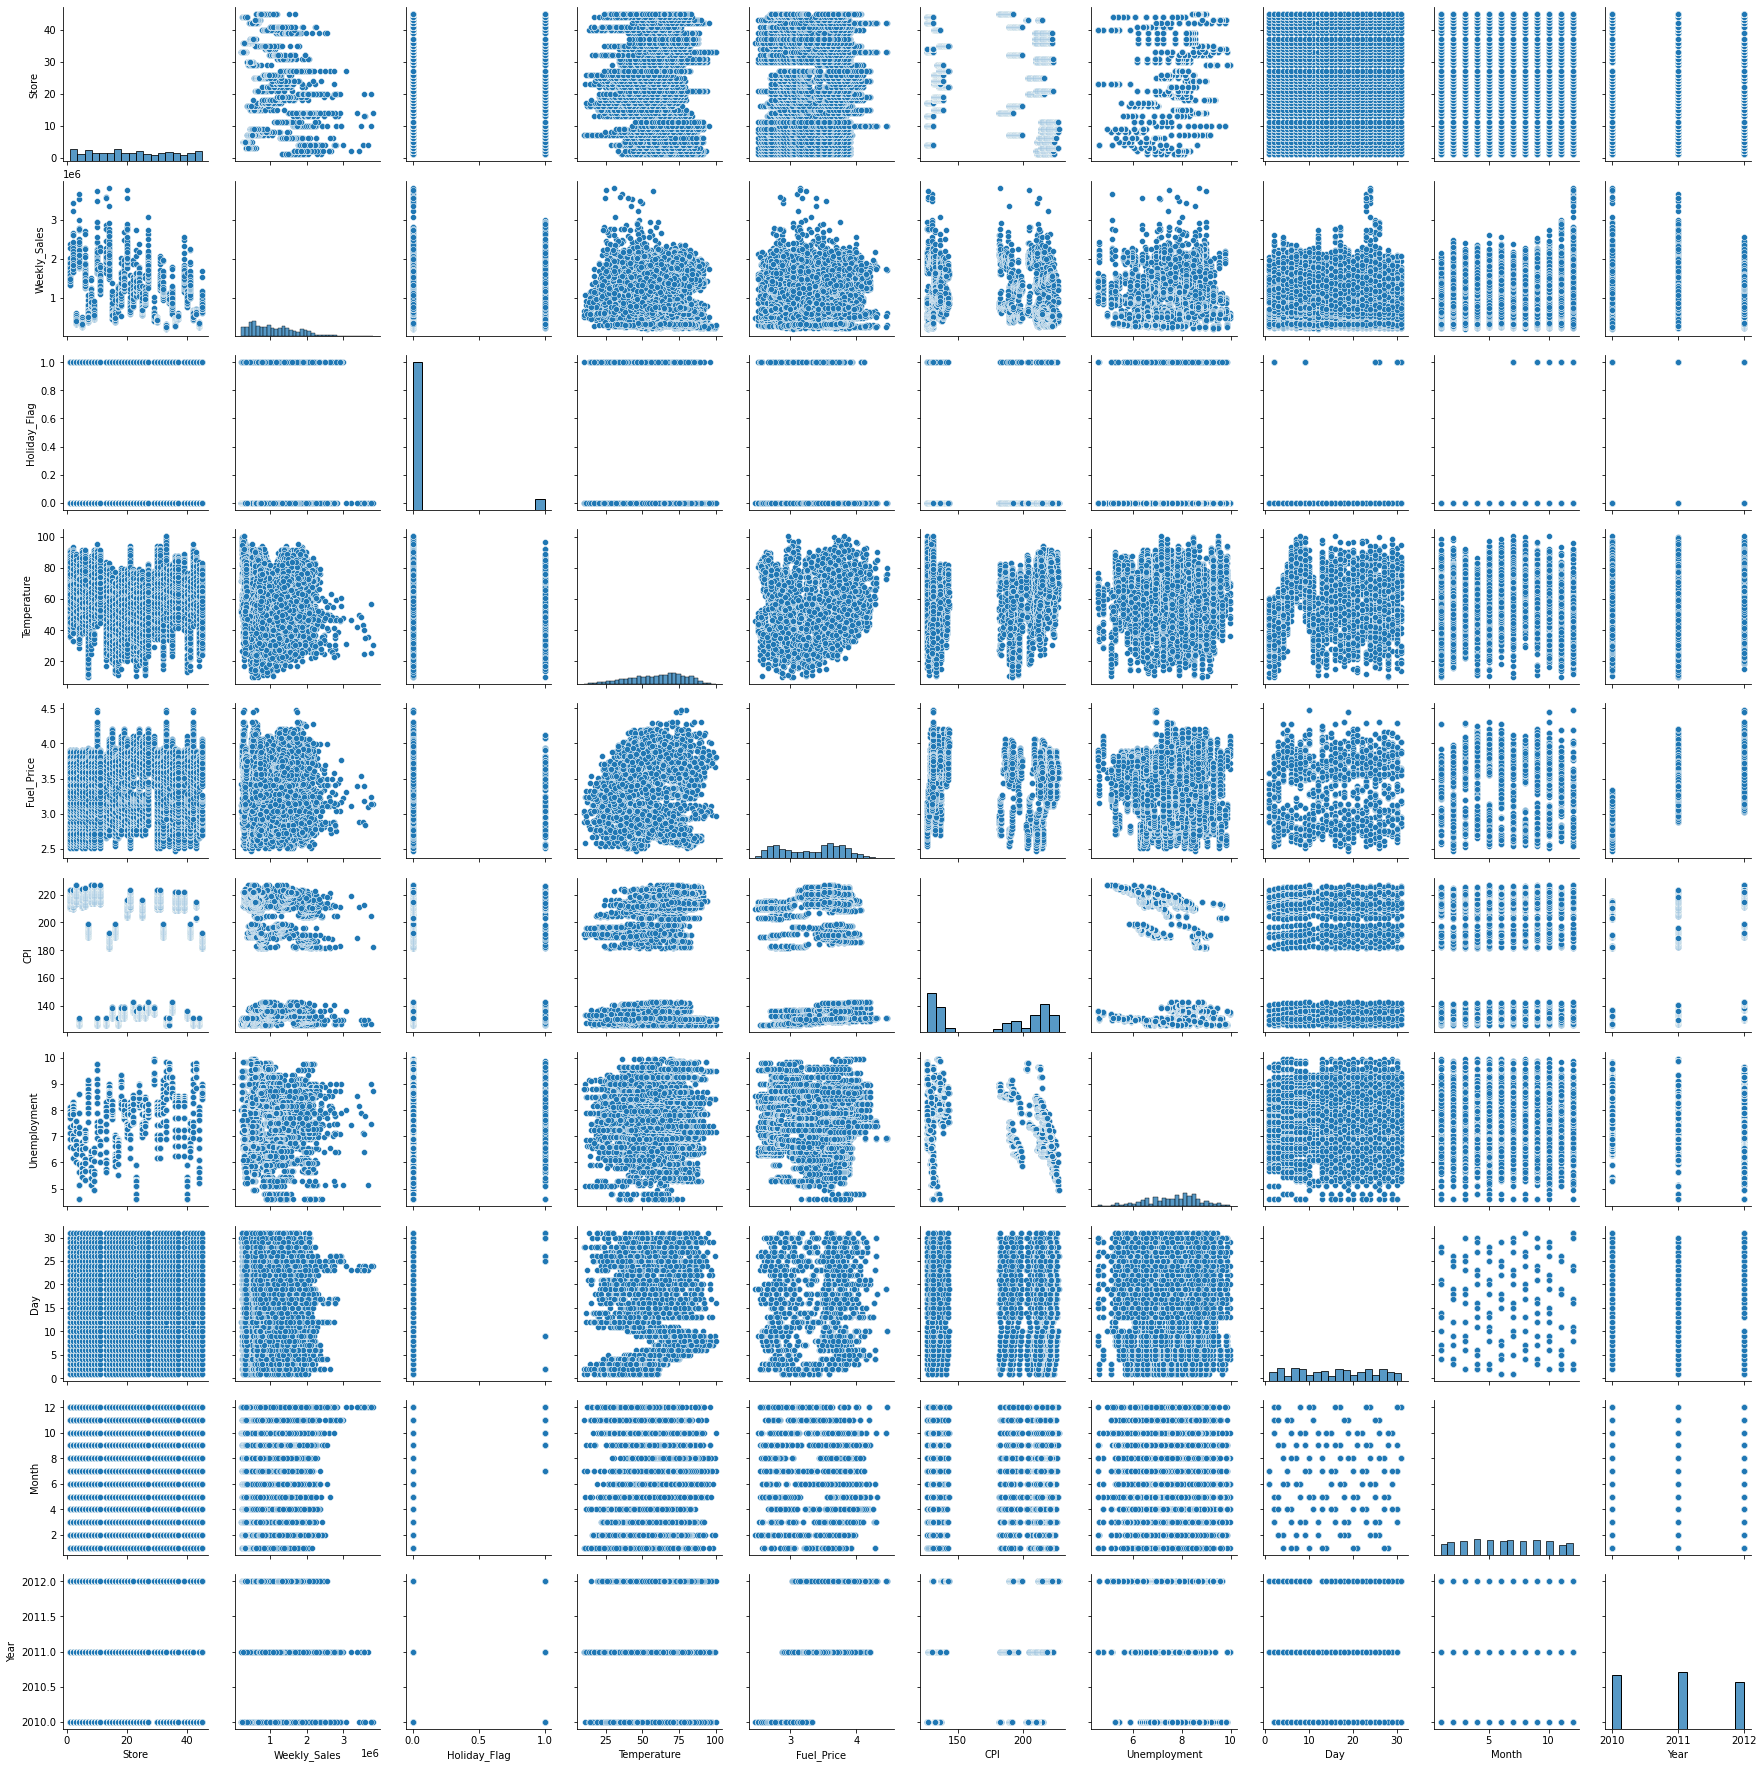

In [ ]:
sns.pairplot(sales_7_11_data_clean)

In [ ]:
categories_dummy = pd.get_dummies(sales_7_11_data_clean,prefix=['Store'], columns = ['Store'], drop_first=True)

In [ ]:
categories_dummy.columns

Index(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Store_2', 'Store_3',
       'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9',
       'Store_10', 'Store_11', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
       'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22',
       'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_29',
       'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35',
       'Store_36', 'Store_37', 'Store_39', 'Store_40', 'Store_41', 'Store_42',
       'Store_43', 'Store_44', 'Store_45'],
      dtype='object')

In [ ]:
categories_dummy = pd.get_dummies(categories_dummy,prefix=['Day'], columns = ['Day'], drop_first=True)
categories_dummy = pd.get_dummies(categories_dummy,prefix=['Month'], columns = ['Month'], drop_first=True)
categories_dummy = pd.get_dummies(categories_dummy,prefix=['Year'], columns = ['Year'], drop_first=True)

In [ ]:
categories_dummy

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
sales_7_11_data_clean=categories_dummy.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Weekly_Sales_MM=MinMaxScaler()
Temperature_MM=MinMaxScaler()

Fuel_Price_MM=MinMaxScaler()
CPI_MM=MinMaxScaler()
Unemployment_MM=MinMaxScaler()
Store_MM=MinMaxScaler()


In [ ]:
sales_7_11_data_clean['Weekly_Sales']=Weekly_Sales_MM.fit_transform(sales_7_11_data_clean[['Weekly_Sales']])
sales_7_11_data_clean['Temperature']=Temperature_MM.fit_transform(sales_7_11_data_clean[['Temperature']])
sales_7_11_data_clean['Fuel_Price']=Fuel_Price_MM.fit_transform(sales_7_11_data_clean[['Fuel_Price']])
sales_7_11_data_clean['CPI']=CPI_MM.fit_transform(sales_7_11_data_clean[['CPI']])
sales_7_11_data_clean['Unemployment']=Unemployment_MM.fit_transform(sales_7_11_data_clean[['Unemployment']])

In [ ]:
sales_7_11_data_clean

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012
0,2010-05-02,0.397291,0,0.357801,0.050100,0.840500,0.654404,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2010-12-02,0.396811,1,0.315602,0.038076,0.841941,0.654404,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2010-02-19,0.388501,0,0.331371,0.021042,0.842405,0.654404,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,0.332458,0,0.405775,0.044589,0.842707,0.654404,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,0.372661,0,0.404331,0.076653,0.843008,0.654404,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,0.139437,0,0.608440,0.764028,0.651876,0.761799,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6431,2012-05-10,0.145057,0,0.608551,0.758016,0.653427,0.758640,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6432,2012-12-10,0.145337,0,0.492837,0.765531,0.654977,0.758640,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6433,2012-10-19,0.140810,0,0.515047,0.750000,0.655013,0.758640,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
sales_7_11_data_clean.drop('Date',axis=1,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

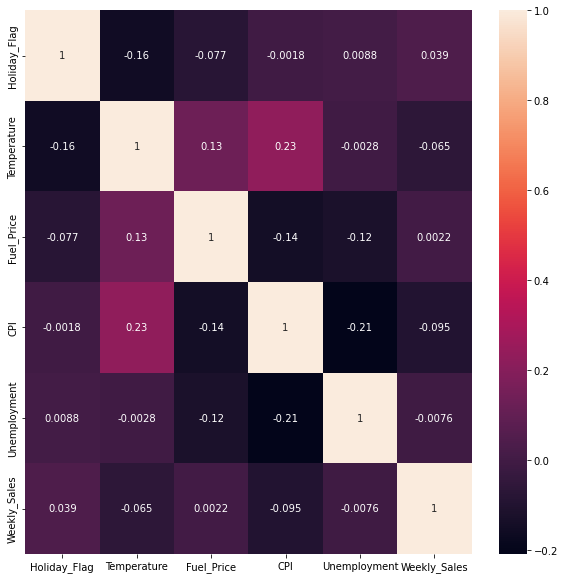

In [ ]:
corr = sales_7_11_data_clean[['Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment','Weekly_Sales']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)             
plt.plot()

In [ ]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = sales_7_11_data_clean.drop('Weekly_Sales',axis=1)
Y = sales_7_11_data_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Mean Absolute Error: 0.02600098361993637
Mean Squared Error: 0.0014290593261035765
Root Mean Squared Error: 0.03780290102761396


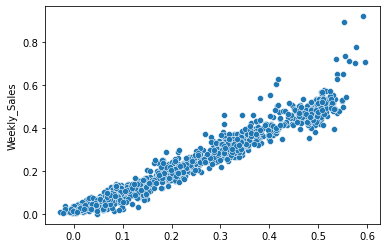

In [ ]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9452138436912131

In [ ]:
r2_score(Y_train, reg.predict(X_train))

0.9398917039797428

In [ ]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    pred=model.predict(X)
    r2 = r2_score(y,pred)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

# 

In [ ]:
print(adj_r2(X_train, Y_train, reg))

0.9386857440280288


In [ ]:
print(adj_r2(X_test, Y_test, reg))

0.9405344119143589
